# Bayesian Inference Model

In Bayesian inference approach, we associate a membership probability for each galaxy in the following manner: <br>

$$
P(\textit{member}\;| \;R,z,c,N_c,N_f) = \frac{P(R,z,c,N_c,N_f|\; \textit{member})P(\textit{member})}{P(R,z,c)}
$$

where $ P(R,z,c,N_c,N_f|\; \textit{membership}) $ is our likelihood model and $P(\textit{membership})$ is our prior. The marginal, $P(R,z,c)$, is the probability of measuring any galaxy in the field or the cluster.

## Prior

In this notebook, we quantify our prior precision. Basically, we have two models for the prior, one that is simply the sum of the galaxies and one that is based on a beta distribution.

**A) Counting model**: George et al. 2011 defined the prior as:

$$
P(\textit{member}) = N_c/(N_c+N_f) = 1-P(\textit{field})
$$

which is based on the relative numbers of galaxies inside a cylinder of length $3\sigma$.

**B) Beta Distribution:** since the $P(\textit{member})$ is a number between 0 and 1 and it's a reflection of $P(\textit{member})=1-P(\textit{field})$ we can write both variables as beta distribution, $Beta(x;\alpha,\beta)$. 

$$
f(x,\alpha,\beta) = \frac{\Gamma(\alpha+\beta) x^{a-1} (1-x)^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)} \qquad \qquad \text{where} \quad \alpha=N_c \; ,\; \beta=N_{f} \; \text{and} \; x = N_c/(N_c+N_f)
$$

Where $x \in [0,1]$ and $\alpha$ and $\beta$ positive numbers. Notice that $x$ is simply the prior for the model **A**. The number of cluster and field galaxies are taken into account by the beta distribution. The diffence in this models  can be significant in the low counts since $x$ is biased due to the poissonian random fluctuations. 

This is an informative prior, to compute $P(\textit{member})$ you need to integrate the probabilities over your model.

$$
P(\textit{member}| \alpha, \beta) = {\rm E}\left[P(Model_{Radial}|member)(x) Beta(x| \alpha, \beta)\right]
$$

where $x$ is the probability of galaxy being a member. Basically, we use our prior knowledge of $N_c, N_f$ and the radial distribution of the members to estimate the probability.

# Copacabana 

In this lines, I'll load the copacabana output and investigate the addition of the Beta Distribution.

In [1]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns; sns.set(color_codes=True)
plt.rcParams.update({'font.size': 16})
sns.set_style("whitegrid")

import numpy as np
from scipy.interpolate import interp1d
import scipy

from collections import defaultdict

In [2]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
cfg  = root+'config_buzzard_v2.yaml'

copa = copacabana(cfg,dataset='buzzard_v2')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00034.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00035.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00038.hdf5
/data/des61.a/data/johnny

In [47]:
cfg='/home/s1/jesteves/git/ccopa/config_files/config_copa_dc2.yaml'
dataset='cosmoDC2'

copa = copacabana(cfg,dataset=dataset)

In [119]:
#run_name = u'gauss003_r200_02Lstar_nfw'
run_name = u'gauss003-v2-r200-ztest'
cat = copa.load_copa_out('cluster',run_name)
gal = copa.load_copa_out('members',run_name)

In [170]:
zmask = np.logical_not(gal['zmask'])
true  = gal['GID']>0.

print(100.*np.count_nonzero(zmask&true)/np.count_nonzero(true))

47.0636184648


## Loading $\alpha$ and $\beta$

We're making a correction on the $n_c$ only for this purpose. In another notebook I'll investigate why $n_c$ is biased.

In [121]:
pz_factor=0.84

In [122]:
area = cat['Area']

Nc = cat['Norm']#/pz_factor
Nf = cat['Nbkg']*area

Nt = cat['Ngals_true']#/pz_factor
Nft= cat['Nbkg_true']*area

Ncf = Nc+Nf

In [123]:
## Correcting Nc 
## Only for test purposes

# Nc = 1.34*Nc

In [124]:
alpha = np.array(Nc).copy()
beta  = np.array(Nf).copy()

In [125]:
# alpha = np.array(Nt).copy()
# beta  = np.array(Nft).copy()

In [126]:
cat['Norm','Nbkg']

Norm,Nbkg
float64,float64
102.2839947579763,237.62044314300047
30.190847567226218,57.20272092137105
20.169432399708796,152.19221408151984
32.338475829513406,33.9278818678914
7.975392391180052,75.95164298125927
79.02185602611434,3968.4416006017495
52.22274820577801,45.26934411819332
6.041528708758029,220.09170198859846
44.54177057877871,79.40512562205198


## Bayesian Approach: Membership probabilities

Let's compute the new membership probabilities.

In [127]:
def chunks(ids1, ids2):
    """Yield successive n-sized chunks from data"""
    for id in ids2:
        w, = np.where( ids1==id )
        yield w

In [128]:
def set_new_columns(table,columns,val=0.):
    for col in columns:
        table[col] = val
    return table

### Prior Example

For a given cluster, we show the prior distribution.

In [129]:
cids = np.array(cat['CID'])
gids = np.array(gal['CID'])
r200 = np.array(cat['R200'])
zcls = np.array(cat['redshift'])
keys = list(chunks(gids,cids))


In [130]:
#gal.rename_column('redshift_1','redshift')

In [131]:
i=32
b = BayesianProbability(alpha[i],beta[i],r2=r200[i])
b.assign_probabilities(gal[keys[i]])

ratio: 1.00


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in divide


In the figure above we illustrate the prior choice. The Beta Distribution has its mean at the prior probability $\alpha/(\alpha+\beta)=N_c/(N_c+N_f)$ (blue dashed line), which corresponds to the choice of a non informative prior. In our informative prior approach we marginilize the membership probability over the likelihood (black curve) and our new prior prior probability is the mean of this distribution (red dashed line). We can see that our new $P(member)$ has a slightly higher value. We note that for this purposes, our likelihood only depends on the radial distance, this choice is eplained on a later section.

(0.01, 70.0)

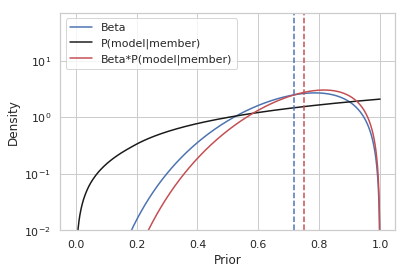

In [132]:
b.plot_prior_distribution()
plt.yscale('log')
plt.ylim(1e-2,7e1)

In [133]:
np.sum(b.pdf)

0.9999999999999999

In [134]:
np.sum(b.prob['marginal']['pdf'])#/(alpha[i]+beta[i])

1.0

In [172]:
ncls    = len(cat)
columns = ['flat','beta','old']

## compute the new probabilities
cla,res = [],[]
for i in range(ncls):
    print('alpha,beta: %.2f ,%.2f'%(alpha[i],beta[i]))
    b = BayesianProbability(alpha[i],beta[i],r2=r200[i])
    b.assign_probabilities(gal[keys[i]])
    b.compute_ngals()
    
    res.append(b.prob)
    cla.append(b)
    del b

alpha,beta: 102.28 ,12.70
ratio: 1.00
alpha,beta: 30.19 ,3.19
ratio: 1.00
alpha,beta: 20.17 ,8.24
ratio: 1.00
alpha,beta: 32.34 ,5.44
ratio: 1.00
alpha,beta: 7.98 ,2.30
ratio: 1.00
alpha,beta: 79.02 ,27.52
ratio: 1.00
alpha,beta: 52.22 ,5.05
ratio: 1.00
alpha,beta: 6.04 ,7.50
ratio: 1.00
alpha,beta: 44.54 ,4.72
ratio: 1.00
alpha,beta: 5.60 ,3.69
ratio: 1.00
alpha,beta: 2.27 ,4.11
ratio: 1.00
alpha,beta: 93.60 ,16.70
ratio: 1.00
alpha,beta: 3.77 ,4.90
ratio: 1.00
alpha,beta: 17.57 ,10.60
ratio: 1.00
alpha,beta: 7.77 ,2.51
ratio: 1.00
alpha,beta: 3.20 ,2.43
ratio: 1.00
alpha,beta: 9.02 ,2.20
ratio: 1.00
alpha,beta: 29.53 ,6.41
ratio: 1.00
alpha,beta: 15.85 ,4.94
ratio: 1.00
alpha,beta: 23.81 ,1.72
ratio: 1.00
alpha,beta: 9.19 ,7.39
ratio: 1.00
alpha,beta: 31.79 ,8.91
ratio: 1.00


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in divide


alpha,beta: 5.87 ,3.11
ratio: 1.00
alpha,beta: 18.33 ,11.16
ratio: 1.00
alpha,beta: 82.70 ,11.34
ratio: 1.00
alpha,beta: 8.33 ,5.98
ratio: 1.00
alpha,beta: 44.99 ,24.29
ratio: 1.00
alpha,beta: 4.10 ,1.80
ratio: 1.00
alpha,beta: 47.42 ,4.05
ratio: 1.00
alpha,beta: 12.07 ,6.38
ratio: 1.00
alpha,beta: 22.41 ,3.47
ratio: 1.00
alpha,beta: 3.98 ,1.55
ratio: 1.00
alpha,beta: 6.12 ,2.40
ratio: 1.00
alpha,beta: 33.61 ,6.96
ratio: 1.00
alpha,beta: 18.32 ,6.47
ratio: 1.00
alpha,beta: 111.40 ,15.75
ratio: 1.00
alpha,beta: 6.69 ,5.45
ratio: 1.00
alpha,beta: 12.92 ,3.62
ratio: 1.00
alpha,beta: 8.56 ,3.99
ratio: 1.00
alpha,beta: 14.31 ,2.82
ratio: 1.00
alpha,beta: 2.86 ,6.29
ratio: 1.00
alpha,beta: 201.91 ,11.33
ratio: 1.00
alpha,beta: 12.08 ,2.70
ratio: 1.00
alpha,beta: 4.53 ,1.47
ratio: 1.00
alpha,beta: 2.38 ,1.38
ratio: 1.00
alpha,beta: 2.36 ,2.43
ratio: 1.00
alpha,beta: 41.84 ,4.86
ratio: 1.00
alpha,beta: 27.35 ,4.57
ratio: 1.00
alpha,beta: 11.19 ,1.85
ratio: 1.00
alpha,beta: 126.14 ,23.91
ratio:

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:285: RuntimeWarning: invalid value encountered in multiply


ratio: 1.00
alpha,beta: 8.53 ,1.32
ratio: 1.00
alpha,beta: 4.13 ,4.13
ratio: 1.00
alpha,beta: 10.19 ,3.16
ratio: 1.00
alpha,beta: 49.47 ,13.29
ratio: 1.00
alpha,beta: 2.37 ,2.89
ratio: 1.00
alpha,beta: 10.30 ,3.30
ratio: 1.00
alpha,beta: 33.89 ,4.43
ratio: 1.00
alpha,beta: 7.35 ,4.68
ratio: 1.00
alpha,beta: 25.96 ,5.21
ratio: 1.00
alpha,beta: 6.64 ,1.69
ratio: 1.00
alpha,beta: 33.01 ,4.17
ratio: 1.00
alpha,beta: 6.14 ,1.86
ratio: 1.00
alpha,beta: 5.33 ,10.99
ratio: 1.00
alpha,beta: 29.11 ,9.59
ratio: 1.00
alpha,beta: 43.19 ,5.25
ratio: 1.00
alpha,beta: 8.47 ,2.94
ratio: 1.00
alpha,beta: 46.52 ,7.79
ratio: 1.00
alpha,beta: 15.75 ,7.69
ratio: 1.00
alpha,beta: 5.78 ,1.05
ratio: 1.00
alpha,beta: 7.72 ,1.46
ratio: 1.00
alpha,beta: 16.77 ,6.72
ratio: 1.00
alpha,beta: 24.40 ,7.68
ratio: 1.00
alpha,beta: 9.24 ,3.97
ratio: 1.00
alpha,beta: 39.80 ,14.06
ratio: 1.00
alpha,beta: 19.33 ,10.97
ratio: 1.00
alpha,beta: 3.16 ,2.61
ratio: 1.00
alpha,beta: 8.44 ,5.68
ratio: 1.00
alpha,beta: 19.87 ,10.07


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:287: RuntimeWarning: invalid value encountered in divide


ratio: 1.00
alpha,beta: 18.90 ,4.55
ratio: 1.00
alpha,beta: 5.23 ,5.17
ratio: 1.00
alpha,beta: 14.89 ,5.44
ratio: 1.00
alpha,beta: 9.91 ,11.48
ratio: 1.00
alpha,beta: 8.36 ,2.64
ratio: 1.00
alpha,beta: 27.93 ,2.20
ratio: 1.00
alpha,beta: 20.86 ,15.98
ratio: 1.00
alpha,beta: 11.37 ,2.49
ratio: 1.00
alpha,beta: 36.96 ,8.01
ratio: 1.00
alpha,beta: 27.91 ,5.69
ratio: 1.00
alpha,beta: 27.36 ,2.94
ratio: 1.00
alpha,beta: 8.47 ,7.58
ratio: 1.00
alpha,beta: 14.63 ,5.41
ratio: 1.00
alpha,beta: 3.90 ,5.71
ratio: 1.00
alpha,beta: 2.00 ,2.06
ratio: 1.00
alpha,beta: 40.96 ,14.36
ratio: 1.00
alpha,beta: 26.55 ,2.60
ratio: 1.00
alpha,beta: 7.03 ,4.45
ratio: 1.00
alpha,beta: 3.69 ,2.11
ratio: 1.00
alpha,beta: -2.49 ,6.35
ratio: 1.00
alpha,beta: 16.87 ,2.52
ratio: 1.00
alpha,beta: 5.52 ,3.33
ratio: 1.00
alpha,beta: 8.79 ,2.50
ratio: 1.00
alpha,beta: 12.03 ,4.41
ratio: 1.00
alpha,beta: 8.95 ,5.45
ratio: 1.00
alpha,beta: 79.52 ,15.58
ratio: 1.00
alpha,beta: 24.40 ,2.87
ratio: 1.00
alpha,beta: 30.66 ,3.97

ratio: 1.00
alpha,beta: 55.83 ,6.41
ratio: 1.00
alpha,beta: 24.54 ,7.10
ratio: 1.00
alpha,beta: 9.20 ,4.47
ratio: 1.00
alpha,beta: 16.39 ,7.87
ratio: 1.00
alpha,beta: 148.41 ,35.71
ratio: 1.00
alpha,beta: 1.51 ,7.29
ratio: 1.00
alpha,beta: 37.83 ,17.34
ratio: 1.00
alpha,beta: 35.38 ,12.57
ratio: 1.00
alpha,beta: 29.91 ,18.65
ratio: 1.00
alpha,beta: 17.90 ,2.47
ratio: 1.00
alpha,beta: 24.52 ,2.53
ratio: 1.00
alpha,beta: 53.64 ,11.03
ratio: 1.00
alpha,beta: 2.16 ,4.33
ratio: 1.00
alpha,beta: 16.59 ,3.50
ratio: 1.00
alpha,beta: 2.16 ,4.99
ratio: 1.00
alpha,beta: 7.71 ,2.57
ratio: 1.00
alpha,beta: 18.43 ,6.02
ratio: 1.00
alpha,beta: 14.74 ,4.26
ratio: 1.00
alpha,beta: 13.18 ,8.21
ratio: 1.00
alpha,beta: 13.15 ,3.04
ratio: 1.00
alpha,beta: 21.54 ,7.46
ratio: 1.00
alpha,beta: 31.96 ,16.92
ratio: 1.00
alpha,beta: 28.93 ,6.67
ratio: 1.00
alpha,beta: 62.47 ,49.58
ratio: 1.00
alpha,beta: 2.67 ,2.18
ratio: 1.00
alpha,beta: 9.04 ,3.34
ratio: 1.00
alpha,beta: 10.04 ,7.24
ratio: 1.00
alpha,beta: 26.

ratio: 1.00
alpha,beta: 19.70 ,10.84
ratio: 1.00
alpha,beta: 11.45 ,3.25
ratio: 1.00
alpha,beta: 7.27 ,1.97
ratio: 1.00
alpha,beta: 2.58 ,2.31
ratio: 1.00
alpha,beta: 7.61 ,5.41
ratio: 1.00
alpha,beta: 9.35 ,7.59
ratio: 1.00
alpha,beta: 38.03 ,16.85
ratio: 1.00
alpha,beta: 2.69 ,7.62
ratio: 1.00
alpha,beta: 6.85 ,3.54
ratio: 1.00
alpha,beta: 14.97 ,5.88
ratio: 1.00
alpha,beta: 24.35 ,15.22
ratio: 1.00
alpha,beta: 1.51 ,2.54
ratio: 1.00
alpha,beta: 3.35 ,8.63
ratio: 1.00
alpha,beta: 107.66 ,27.87
ratio: 1.00
alpha,beta: 7.95 ,5.04
ratio: 1.00
alpha,beta: 34.51 ,12.30
ratio: 1.00
alpha,beta: 21.41 ,15.81
ratio: 1.00
alpha,beta: 22.78 ,5.88
ratio: 1.00
alpha,beta: 62.74 ,12.58
ratio: 1.00
alpha,beta: 22.86 ,7.65
ratio: 1.00
alpha,beta: 14.91 ,6.48
ratio: 1.00
alpha,beta: 10.65 ,4.71
ratio: 1.00
alpha,beta: 20.40 ,5.52
ratio: 1.00
alpha,beta: 36.49 ,11.00
ratio: 1.00
alpha,beta: 9.35 ,3.91
ratio: 1.00
alpha,beta: 72.07 ,17.37
ratio: 1.00
alpha,beta: 10.26 ,6.14
ratio: 1.00
alpha,beta: 21.0

alpha,beta: 22.03 ,13.63
ratio: 1.00
alpha,beta: 120.55 ,26.50
ratio: 1.00
alpha,beta: 49.37 ,8.69
ratio: 1.00
alpha,beta: 34.58 ,5.60
ratio: 1.00
alpha,beta: 37.41 ,14.91
ratio: 1.00
alpha,beta: 5.56 ,10.64
ratio: 1.00
alpha,beta: 21.03 ,7.86
ratio: 1.00
alpha,beta: 15.59 ,15.40
ratio: 1.00
alpha,beta: 8.41 ,0.92
ratio: 1.00
alpha,beta: 14.82 ,8.03
ratio: 1.00
alpha,beta: 118.97 ,14.59
ratio: 1.00
alpha,beta: 27.04 ,6.20
ratio: 1.00
alpha,beta: 16.33 ,5.65
ratio: 1.00
alpha,beta: 17.59 ,17.07
ratio: 1.00
alpha,beta: 11.62 ,6.55
ratio: 1.00
alpha,beta: 29.97 ,13.44
ratio: 1.00
alpha,beta: 10.67 ,2.61
ratio: 1.00
alpha,beta: 14.48 ,8.07
ratio: 1.00
alpha,beta: 19.37 ,3.23
ratio: 1.00
alpha,beta: 22.32 ,9.32
ratio: 1.00
alpha,beta: 12.17 ,5.74
ratio: 1.00
alpha,beta: 85.85 ,22.08
ratio: 1.00
alpha,beta: 69.67 ,10.67
ratio: 1.00
alpha,beta: 23.95 ,11.11
ratio: 1.00
alpha,beta: 18.96 ,7.15
ratio: 1.00
alpha,beta: 87.09 ,14.26
ratio: 1.00
alpha,beta: 8.23 ,1.63
ratio: 1.00
alpha,beta: 10.18

ratio: 1.00
alpha,beta: 34.04 ,11.22
ratio: 1.00
alpha,beta: 64.49 ,24.96
ratio: 1.00
alpha,beta: 14.81 ,8.84
ratio: 1.00
alpha,beta: 21.48 ,24.91
ratio: 1.00
alpha,beta: 28.53 ,8.51
ratio: 1.00
alpha,beta: 20.25 ,14.49
ratio: 1.00
alpha,beta: 6.73 ,7.71
ratio: 1.00
alpha,beta: 13.33 ,4.83
ratio: 1.00
alpha,beta: 20.47 ,7.12
ratio: 1.00
alpha,beta: 17.82 ,10.13
ratio: 1.00
alpha,beta: 10.03 ,6.03
ratio: 1.00
alpha,beta: 17.93 ,2.80
ratio: 1.00
alpha,beta: 64.31 ,19.03
ratio: 1.00
alpha,beta: 11.18 ,7.40
ratio: 1.00
alpha,beta: 12.58 ,2.97
ratio: 1.00
alpha,beta: 56.37 ,14.26
ratio: 1.00
alpha,beta: 17.89 ,17.56
ratio: 1.00
alpha,beta: 60.07 ,10.16
ratio: 1.00
alpha,beta: 108.84 ,25.93
ratio: 1.00
alpha,beta: 75.08 ,36.90
ratio: 1.00
alpha,beta: 27.23 ,5.30
ratio: 1.00
alpha,beta: 101.66 ,11.40
ratio: 1.00
alpha,beta: 74.46 ,17.63
ratio: 1.00
alpha,beta: 34.79 ,20.60
ratio: 1.00
alpha,beta: 19.21 ,8.37
ratio: 1.00
alpha,beta: 12.49 ,3.92
ratio: 1.00
alpha,beta: 88.21 ,26.21
ratio: 1.00


ratio: 1.00
alpha,beta: 18.85 ,4.71
ratio: 1.00
alpha,beta: 5.02 ,5.61
ratio: 1.00
alpha,beta: 25.32 ,11.20
ratio: 1.00
alpha,beta: 6.60 ,3.31
ratio: 1.00
alpha,beta: 6.34 ,4.92
ratio: 1.00
alpha,beta: 12.22 ,5.28
ratio: 1.00
alpha,beta: 32.27 ,12.03
ratio: 1.00
alpha,beta: 29.35 ,6.02
ratio: 1.00
alpha,beta: 3.05 ,10.53
ratio: 1.00
alpha,beta: 17.21 ,10.36
ratio: 1.00
alpha,beta: 76.47 ,23.08
ratio: 1.00
alpha,beta: 81.31 ,20.96
ratio: 1.00
alpha,beta: 34.07 ,20.67
ratio: 1.00
alpha,beta: 14.26 ,7.01
ratio: 1.00
alpha,beta: 61.22 ,29.91
ratio: 1.00
alpha,beta: 67.46 ,11.77
ratio: 1.00
alpha,beta: 68.06 ,25.32
ratio: 1.00
alpha,beta: 3.37 ,3.63
ratio: 1.00
alpha,beta: 49.73 ,11.99
ratio: 1.00
alpha,beta: 11.10 ,7.77
ratio: 1.00
alpha,beta: 15.90 ,6.31
ratio: 1.00
alpha,beta: 11.88 ,10.35
ratio: 1.00
alpha,beta: 13.29 ,5.47
ratio: 1.00
alpha,beta: 12.35 ,5.42
ratio: 1.00
alpha,beta: 12.88 ,4.42
ratio: 1.00
alpha,beta: 20.13 ,20.21
ratio: 1.00
alpha,beta: 63.26 ,19.97
ratio: 1.00
alpha,b

ratio: 1.00
alpha,beta: 18.87 ,12.54
ratio: 1.00
alpha,beta: 20.41 ,7.75
ratio: 1.00
alpha,beta: 48.75 ,14.90
ratio: 1.00
alpha,beta: 68.86 ,24.46
ratio: 1.00
alpha,beta: 1.64 ,6.81
ratio: 1.00
alpha,beta: 45.83 ,22.58
ratio: 1.00
alpha,beta: 9.39 ,21.33
ratio: 1.00
alpha,beta: 45.51 ,22.83
ratio: 1.00
alpha,beta: 47.16 ,12.81
ratio: 1.00
alpha,beta: 71.16 ,32.68
ratio: 1.00
alpha,beta: 35.14 ,27.66
ratio: 1.00
alpha,beta: 31.56 ,9.83
ratio: 1.00
alpha,beta: 11.81 ,8.23
ratio: 1.00
alpha,beta: 27.95 ,8.62
ratio: 1.00
alpha,beta: 100.29 ,13.65
ratio: 1.00
alpha,beta: 3.21 ,5.39
ratio: 1.00
alpha,beta: 44.99 ,11.49
ratio: 1.00
alpha,beta: 23.51 ,8.39
ratio: 1.00
alpha,beta: 17.20 ,3.34
ratio: 1.00
alpha,beta: 2.07 ,4.92
ratio: 1.00
alpha,beta: 35.93 ,10.20
ratio: 1.00
alpha,beta: 83.39 ,19.70
ratio: 1.00
alpha,beta: 2.75 ,3.96
ratio: 1.00
alpha,beta: 24.95 ,8.22
ratio: 1.00
alpha,beta: 23.25 ,7.21
ratio: 1.00
alpha,beta: 35.16 ,16.03
ratio: 1.00
alpha,beta: 1.80 ,4.98
ratio: 1.00
alpha,b

ratio: 1.00
alpha,beta: 14.28 ,6.26
ratio: 1.00
alpha,beta: 54.00 ,17.61
ratio: 1.00
alpha,beta: 16.34 ,15.31
ratio: 1.00
alpha,beta: 8.44 ,6.68
ratio: 1.00
alpha,beta: 14.40 ,9.75
ratio: 1.00
alpha,beta: 23.24 ,6.09
ratio: 1.00
alpha,beta: 9.13 ,5.56
ratio: 1.00
alpha,beta: 10.56 ,6.98
ratio: 1.00
alpha,beta: 19.26 ,9.49
ratio: 1.00
alpha,beta: 21.07 ,7.50
ratio: 1.00
alpha,beta: 7.06 ,6.46
ratio: 1.00
alpha,beta: 5.79 ,7.81
ratio: 1.00
alpha,beta: 26.94 ,41.45
ratio: 1.00
alpha,beta: 16.96 ,14.54
ratio: 1.00
alpha,beta: 34.54 ,13.40
ratio: 1.00
alpha,beta: 77.76 ,29.82
ratio: 1.00
alpha,beta: 5.74 ,7.54
ratio: 1.00
alpha,beta: 11.81 ,8.06
ratio: 1.00
alpha,beta: 6.60 ,7.64
ratio: 1.00
alpha,beta: 50.76 ,15.56
ratio: 1.00
alpha,beta: 23.92 ,13.09
ratio: 1.00
alpha,beta: 27.93 ,24.85
ratio: 1.00
alpha,beta: 13.78 ,12.17
ratio: 1.00
alpha,beta: 33.42 ,13.86
ratio: 1.00
alpha,beta: 8.30 ,10.11
ratio: 1.00
alpha,beta: 36.84 ,12.80
ratio: 1.00
alpha,beta: 96.99 ,31.47
ratio: 1.00
alpha,bet

alpha,beta: 0.65 ,19.16
ratio: 1.00
alpha,beta: 3.52 ,6.83
ratio: 1.00
alpha,beta: 67.27 ,38.67
ratio: 1.00
alpha,beta: 38.01 ,27.71
ratio: 1.00
alpha,beta: 104.44 ,21.53
ratio: 1.00
alpha,beta: 12.80 ,6.90
ratio: 1.00
alpha,beta: 7.34 ,9.21
ratio: 1.00
alpha,beta: 65.51 ,30.71
ratio: 1.00
alpha,beta: 21.26 ,19.86
ratio: 1.00
alpha,beta: 36.18 ,13.72
ratio: 1.00
alpha,beta: 37.93 ,32.23
ratio: 1.00
alpha,beta: 21.12 ,9.99
ratio: 1.00
alpha,beta: 12.95 ,9.32
ratio: 1.00
alpha,beta: 35.16 ,15.75
ratio: 1.00
alpha,beta: 28.32 ,21.36
ratio: 1.00
alpha,beta: 30.17 ,23.13
ratio: 1.00
alpha,beta: 24.51 ,8.94
ratio: 1.00
alpha,beta: 5.40 ,12.60
ratio: 1.00
alpha,beta: 102.91 ,26.80
ratio: 1.00
alpha,beta: 17.13 ,17.37
ratio: 1.00
alpha,beta: 39.28 ,19.89
ratio: 1.00
alpha,beta: 4.10 ,11.54
ratio: 1.00
alpha,beta: 26.24 ,11.35
ratio: 1.00
alpha,beta: 16.84 ,11.07
ratio: 1.00
alpha,beta: 22.97 ,15.31
ratio: 1.00
alpha,beta: 6.78 ,10.95
ratio: 1.00
alpha,beta: 17.86 ,15.25
ratio: 1.00
alpha,beta:

### Comparing The Prior Choices:

Here we compare the difference between the two choices of priors, flat and beta.

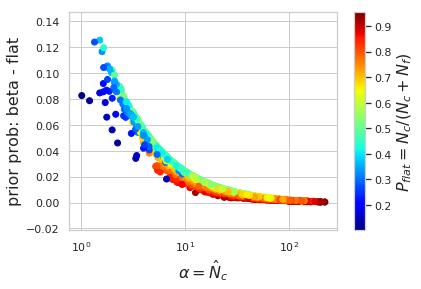

In [173]:
pflat = np.array([res[i]['prior']['flat'] for i in range(ncls)])
pbeta = np.array([res[i]['prior']['beta'] for i in range(ncls)])

plt.scatter(alpha,(pbeta-pflat),c=pflat,cmap='jet')
plt.xscale('log')
plt.ylabel('prior prob: beta - flat',fontsize=16)
plt.xlabel(r'$\alpha = \hat{N}_{c}$',fontsize=16)
plt.colorbar().set_label(r'$P_{flat}=N_c/(N_c+N_f)$',fontsize=16)

The prior prob. difference is below 2.5% for $\alpha>10$, for lower values the difference can be up to 15%, which is signficant. 


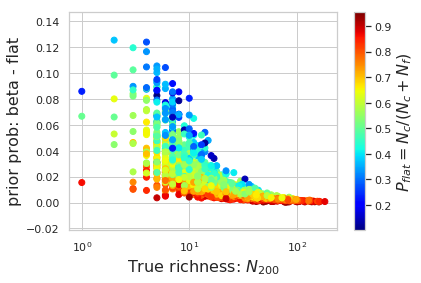

In [174]:
pflat = np.array([res[i]['prior']['flat'] for i in range(ncls)])
pbeta = np.array([res[i]['prior']['beta'] for i in range(ncls)])

plt.scatter(Nt,(pbeta-pflat),c=pflat,cmap='jet')
plt.xscale('log')
plt.ylabel('prior prob: beta - flat',fontsize=16)
plt.xlabel(r'True richness: $N_{200}$',fontsize=16)
plt.colorbar().set_label(r'$P_{flat}=N_c/(N_c+N_f)$',fontsize=16)

The prior choice has its impact on recovering the true richness. The main difference is on the low signal-to-noise ratio cases, i.e. higher number of fields galaxies than cluster galaxies ($P_{flat}<0.5$).

## Comparing the richness

Here we compare the richness for the different estimators, old method, flat and beta priors.

In [175]:
## assign the new probabilities
gal = set_new_columns(gal,columns,val=-99.)
cat = set_new_columns(cat,['Ngals_%s'%c for c in columns],val=-99.)
cat = set_new_columns(cat,['Ngals_z_%s'%c for c in columns],val=-99.)
cat = set_new_columns(cat,['Ngals_r_%s'%c for c in columns],val=-99.)

cat = set_new_columns(cat,[c for c in ['flat','beta']],val=-99.)

for i in range(ncls):
    for col in columns:
        gal[col][keys[i]]  = res[i]['Pmem'][col][:]
        cat['Ngals_%s'%col][i]= res[i]['Ngals'][col]
        cat['Ngals_z_%s'%col][i]= np.nansum(res[i]['Pz'][col][:])
        cat['Ngals_r_%s'%col][i]= np.nansum(res[i]['Pr'][col][:])

    
    for col in ['flat','beta']:
        cat[col][i]= res[i]['prior'][col]

In [176]:
def compute_ptaken(g0,label='Pmem'):
	"""
	it computes p_taken
	"""
	print('compute ptaken')
	# g0.sort('Pmem')
	pmem = g0[label]
	ptaken = np.ones_like(pmem,dtype=float)

	## find common galaxies
	gid = np.array(g0['GID'])#.astype(np.int)
	commonGroups = commonValues(gid)

	for indices in commonGroups:
		pm_group = np.array(pmem[indices])
		pt_group = np.array(ptaken[indices])

		idx_sort = np.argsort(-1*pm_group) ## -1* to reverse order

		pm_group_s = pm_group[idx_sort]
		pt_group_s = pt_group[idx_sort]

		new_pm = 0
		toto = 1
		pm = []
		for i in range(indices.size):
			toto *= (1-new_pm)
			new_pm = toto*pm_group_s[i]
			pt_group_s[i] = toto
			pm.append(new_pm)

		pmem[indices[idx_sort]] = np.array(pm)
		ptaken[indices[idx_sort]] = pt_group_s

	g0[label] = pmem
	#g0['Ptaken'] = ptaken

	return g0

def commonValues(values):
	idx_sort = np.argsort(values)
	sorted_values = values[idx_sort]
	vals, idx_start, count = np.unique(sorted_values, return_counts=True,
                                return_index=True)

	# sets of indices
	res = np.split(idx_sort, idx_start[1:])
	#filter them with respect to their size, keeping only items occurring more than once

	vals = vals[count > 1]
	commonValuesIndicies = [ri for ri in res if ri.size>1]
	
	return commonValuesIndicies


In [177]:
# for col in ['flat','beta','old']:
#     gal = compute_ptaken(gal,col)

In [178]:
for i in range(ncls):
    for col in ['flat','beta','old']:
        cat['Ngals_%s'] = np.nansum(gal[col][keys[i]])

### $N_{200}$ depends on the prior choice?


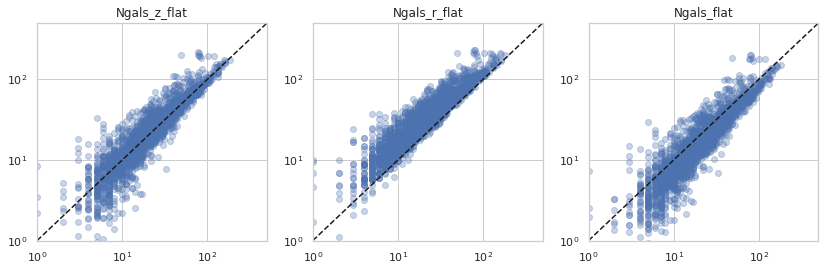

In [179]:
fig = plt.figure(figsize=(14,4))

fig.add_subplot(133)
plot_scale_ngal('Ngals_flat',nmax=500)

fig.add_subplot(131)
plot_scale_ngal('Ngals_z_flat',nmax=500)

fig.add_subplot(132)
plot_scale_ngal('Ngals_r_flat',nmax=500)


In [169]:
#cat['Ngals_flat']

In [31]:
def plot_residual(cat,labela,labelb):
    na, nb = cat['Ngals_%s'%labela],cat['Ngals_%s'%labelb]
    w, = np.where((na>0)&(nb>0))
    pflat  = cat['flat'][w]
    
    x = cat['Ngals_true'][w]
    frac_difference = (na[w]-nb[w])#/nb
    
    plt.scatter(x,frac_difference,c=pflat,cmap='jet')
    plt.axhline(0.,color='k',ls='--')
    plt.xlim(.5,300.)
    plt.xscale('log')
    plt.ylabel(r'$N_{200,%s} - N_{200,%s}$'%(labela,labelb),fontsize=16)
    plt.xlabel(r'True richness: $N_{200}$',fontsize=16)
    plt.colorbar().set_label(r'$P_{flat}=N_c/(N_c+N_f)$',fontsize=16)

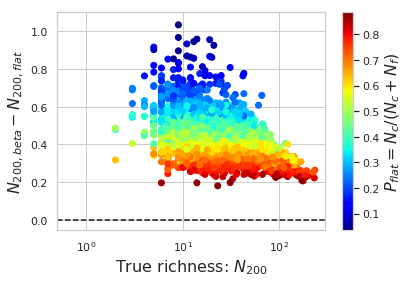

In [32]:
plot_residual(cat,'beta','flat')

The net effect on $N_{200}$ is not significant.

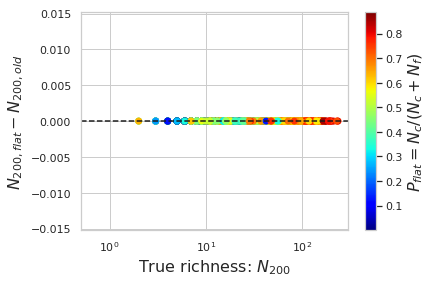

In [33]:
plot_residual(cat,'flat','old')

mean: 0.974
rms : 0.374
out. frac. : 0.026
[0.25       0.31896552 0.38793103 0.45689655 0.52586207 0.59482759
 0.6637931  0.73275862 0.80172414 0.87068966 0.93965517 1.00862069
 1.07758621 1.14655172 1.21551724 1.28448276 1.35344828 1.42241379
 1.49137931 1.56034483 1.62931034 1.69827586 1.76724138 1.8362069
 1.90517241 1.97413793 2.04310345 2.11206897 2.18103448 2.25      ]


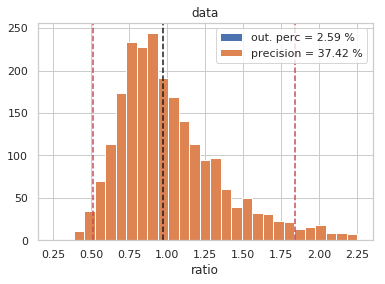

In [45]:
plot_scatter_distribution(cat,'Ngals')

mean: 0.877
rms : 0.443
out. frac. : 0.068
[0.25       0.31896552 0.38793103 0.45689655 0.52586207 0.59482759
 0.6637931  0.73275862 0.80172414 0.87068966 0.93965517 1.00862069
 1.07758621 1.14655172 1.21551724 1.28448276 1.35344828 1.42241379
 1.49137931 1.56034483 1.62931034 1.69827586 1.76724138 1.8362069
 1.90517241 1.97413793 2.04310345 2.11206897 2.18103448 2.25      ]


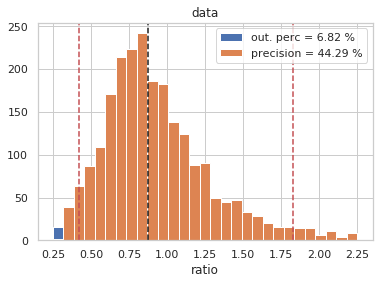

In [39]:
plot_scatter_distribution(cat,'Ngals_flat')

mean: 1.054
rms : 0.428
out. frac. : 0.072
[0.25       0.31896552 0.38793103 0.45689655 0.52586207 0.59482759
 0.6637931  0.73275862 0.80172414 0.87068966 0.93965517 1.00862069
 1.07758621 1.14655172 1.21551724 1.28448276 1.35344828 1.42241379
 1.49137931 1.56034483 1.62931034 1.69827586 1.76724138 1.8362069
 1.90517241 1.97413793 2.04310345 2.11206897 2.18103448 2.25      ]


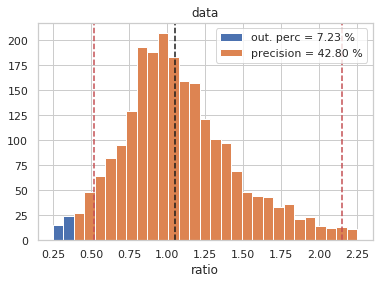

In [40]:
plot_scatter_distribution(cat,'Ngals_z_flat')

mean: 2.042
rms : 0.429
out. frac. : 0.013
[0.25       0.31896552 0.38793103 0.45689655 0.52586207 0.59482759
 0.6637931  0.73275862 0.80172414 0.87068966 0.93965517 1.00862069
 1.07758621 1.14655172 1.21551724 1.28448276 1.35344828 1.42241379
 1.49137931 1.56034483 1.62931034 1.69827586 1.76724138 1.8362069
 1.90517241 1.97413793 2.04310345 2.11206897 2.18103448 2.25      ]


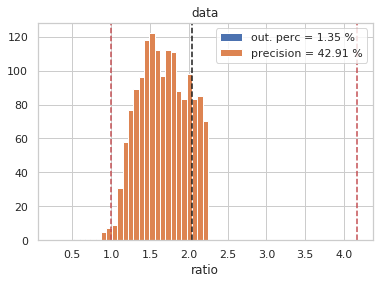

In [41]:
plot_scatter_distribution(cat,'Ngals_r_flat')

Check if the code old prob. definition is consitenty with the new definition.

In [37]:
def plot_scale_ngal(col,nmin=1.,nmax=300.):
    plt.loglog()
    plt.scatter(cat['Ngals_true'],cat[col],alpha=0.3)
    plt.plot([nmin,nmax],[nmin,nmax],'k--')
    plt.xlim(nmin,nmax)
    plt.ylim(nmin,nmax)
    plt.title(col)

In [ ]:
plt.scatter(cat['Ngals_true'],cat['Ngals'],alpha=0.3)
plt.plot([0.5,300.],[0.5,300.],'k--')
plt.xlim(0.5,300.)
plt.ylim(0.5,300.)
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.scatter(cat['Ngals_true'],cat['Ngals_r_flat'],alpha=0.3)
plt.plot([0.5,300.],[0.5,300.],'k--')
plt.xlim(0.5,300.)
plt.ylim(0.5,300.)
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.scatter(cat['Ngals_true'],cat['Ngals_beta'],alpha=0.3)
plt.plot([0.5,300.],[0.5,300.],'k--')
plt.xlim(0.5,300.)
plt.ylim(0.5,300.)
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.scatter(cat['Ngals_true'],cat['Ngals_beta'],alpha=0.3)
plt.plot([0.5,300.],[0.5,300.],'k--')
plt.xlim(0.5,300.)
plt.ylim(0.5,300.)
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.scatter(cat['Ngals_flat'],cat['Ngals_z_flat'],alpha=0.3)
plt.plot([0.5,300.],[0.5,300.],'k--')
plt.xlim(0.5,500.)
plt.ylim(0.5,500.)
plt.xscale('log')
plt.yscale('log')

In [ ]:
plot_scatter_distribution(cat,'Ngals_old')

In [ ]:
plt.scatter(Nt,(cat['Ngals_beta']+Nf)/Ncf,alpha=0.3)
# plt.plot([0.5,300.],[0.5,300.],'k--')
# plt.xlim(0.5,300.)
# plt.ylim(0.5,300.)
plt.xscale('log')
# plt.yscale('log')

In [35]:
def get_variable(cat,label):
    nt0= np.array(cat['Ngals_true']).copy()
    ng0= np.array(cat[label]).copy()
    
    w, = np.where(ng0>0.)
    return nt0[w],ng0[w]

def remove_outliers(x,n=1.5):
    q25,q75 = np.nanpercentile(x,[25,75])
    iqr     = q75-q25
    lo, up  = q25-n*iqr, q75+n*iqr
    mask    = (x<up)&(x>lo)
    return mask

def get_scatter(x,xt):
    residual     = x/xt
    log_residual = np.log10(residual)
    
    check    = np.logical_not(np.isnan(log_residual) | np.isinf(log_residual))
    mask     = remove_outliers(log_residual,n=1.5)&(check)
    
    bias            = 10**np.nanmean(log_residual[mask])
    log_scatter     = np.nanstd(log_residual[mask])
    scatter         = 10**(log_scatter)-1
    
    out_fraction    = 1-1.*np.count_nonzero(mask)/len(x)
    out = {'residual':residual,'log_residual':log_residual,'bias': bias, 
           'scatter':scatter, 'log_scatter':log_scatter, 'outlier_fraction': out_fraction,'mask':mask}
    return out

def plot_scatter_distribution(cat,col,label="data",xmin=0.25,xmax=2.25,logx=False):
    ngalst, ngals = get_variable(cat,col)
    
    w = np.where(ngalst>1)[0]
    res  = get_scatter(ngals[w],ngalst[w])
    print(r'mean: %.3f'%(res['bias']))
    print(r'rms : %.3f'%(res['scatter']))
    print(r'out. frac. : %.3f'%(res['outlier_fraction']))
    
    if logx:
        xbins    = np.linspace(np.log10(xmin),np.log10(xmax),30)
        residual = res['log_residual']
        xm       = np.log10(res['bias'])
        xlo,xup  = xm-2*res['log_scatter'],xm+2*res['log_scatter']
        
    else:
        xbins = np.linspace(xmin,xmax,30)
        residual = res['residual']
        xm       = res['bias']
        xlo,xup  = 10**(np.log10(xm)-2*res['log_scatter']),10**(np.log10(xm)+2*res['log_scatter'])
    print(xbins)
    check     = np.logical_not(np.isnan(residual))&np.logical_not(np.isinf(residual))
    _ = plt.hist(residual[check],bins=xbins,label='out. perc = %.2f %%'%(100*res['outlier_fraction']))
    _ = plt.hist(residual[res['mask']],bins=xbins,label=r'precision = %.2f %%'%(100*res['scatter']))
    plt.axvline(xm,color='k',ls='--')
    plt.axvline(xlo,color='r',ls='--')
    plt.axvline(xup,color='r',ls='--')
    plt.title(label)
    # plt.yscale('log')
    plt.xlabel('ratio')
    plt.legend()

In [36]:
def plot_fraction_pmem(galaxies,lcol='Pmem',color='r',label='_noLabel_',save=False):
    pmem = galaxies[lcol]
    mask = galaxies['True']==True

    pmem_edges = np.arange(0.0,1.1,0.1)
    idx, x_bin = makeBin(pmem, pmem_edges)
    fraction_bin = [len(galaxies[ix][mask[ix]])/(len(galaxies[ix])+1e-9) for ix in idx ]

    # fig = plt.figure(figsize=(6,6))
    plt.scatter(x_bin,fraction_bin,color=color,s=50,label=label)
    plt.plot(np.linspace(0,1.,100),np.linspace(0,1.,100),linestyle='--',color='k')

def makeBin(variable, xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins


In [171]:
class BayesianProbability:
    ''' Assign Membership Probabilities For Copacabana Galaxies

    input: alpha, beta, gal
    output: collection('prior','marginal','pdfs','pdfs_field','Pmem','Pr','Pz','Pc')

    alpha: Estimated number of galaxies inside the cluster area
    beta: Estimated number of field galaxies inside the cluster area
    gal: table of galaxies, columns: redshift,pdf,pdfr,pdfz,pdfc and also the field pdfs

    r2: r200, if None use the value from gal
    '''
    def __init__(self, a, b, r2=None):
        self.alpha = np.where(a<=0.,.1,a)
        self.beta  = b
        self.betaDist = scipy.stats.beta(self.alpha, self.beta)
        self.ntotal= a+b
        self.ratio = 1.
        
        self.r2    = r2
        

        self.prob  = defaultdict(dict)
        # ['prior','marginal','pdfs','pdfs_field','Pmem','Pr','Pz','Pc']

        ## init the prior
        self.compute_flat_prior()

    def updatate_ratio(self):
        self.ratio = 1.#*self.ntotal/self.size
        print('ratio: %.2f'%self.ratio)
        
    def load_pdfs(self,gal):
        self.nsize = np.count_nonzero(gal['zmask'])
        self.updatate_ratio()
        
        if self.r2 is None: self.r2 = float(gal['R200'][0])
        #zcls = np.array(gal['redshift'][:]).copy()
        
        self.pdfz = np.array(gal['pdfz'][:]).copy()
        self.pdfr = np.array(gal['pdfr'][:]).copy()
        #self.pdfc = get_color_pdf(zcls,gal['pdfc'][:]).copy()
        
        self.pdfzf= np.array(gal['pdfz_bkg'][:]).copy()
        self.pdfrf= get_frequency(np.ones_like(self.pdfr)) #np.array(gal['pdfr_bkg'][:]).copy()
        #self.pdfcf= get_color_pdf(zcls,gal['pdfc_bkg'][:]).copy()        
        
        zmask = gal['zmask']
        self.pdfrf = np.where(zmask,self.pdfrf,0.)
        self.pdfr  = np.where(zmask,self.pdfr,0.)
        
        models       = [self.pdfr,self.pdfz]
        models_field = [self.pdfrf,self.pdfzf]

        self.pdf     = get_full_pdf(models)
        self.pdff    = get_full_pdf(models_field)

#         self.pdf = np.array(gal['pdf'][:]).copy()
#         self.pdff= np.array(gal['pdf_bkg'][:]).copy()
        
    def compute_flat_prior(self):
        pm0 = self.betaDist.mean()
        
        priors = {'flat':pm0,'beta':None}
        self.prob['prior'] = priors

    def compute_marginal(self,name,prior_type):
        pm0 = self.prob['prior'][prior_type]
        pf,pff = self.pick_pdf(name)
        res    = pf*pm0 + pff*(1-pm0)
        self.prob['marginal'][name] = res.copy()
    
    def compute_prob(self,label,name,prior_type,eps=1e-12):
        pm0 = self.prob['prior'][prior_type]
        pdf,pdff = self.pick_pdf(name)
        mar = pdf*pm0 + pdff*(1-pm0)
        res = pdf*pm0/(mar*self.ratio)
        pmem= filter_prob(res.copy())
        self.prob[label][prior_type] = pmem.copy()
    
    def compute_likelihood(self,nbins=40):
        self.pvec = np.linspace(0.,1.,1000)
        pm0   = self.prob['prior']['flat']
        radii = np.linspace(0,self.r2,100)
        pdf   = radial_pdf(radii,self.r2)
        mar   = pdf*pm0+(1-pm0)*(np.pi*self.r2**2)
        p0 = pdf*pm0/(mar+1e-9)
        self.likelihood = get_likelihood(self.pvec,p0,pdf,nbins=nbins)
    
    def compute_beta_prior(self):
        ## assumes a likelihood that only depends on R
        self.compute_likelihood()

        prior = join_pdfs(self.pvec,self.likelihood,self.betaDist.pdf(self.pvec))
        pm0   = mean_pdf(self.pvec,prior)

        self.prob['prior']['beta'] = pm0
        self.prior = prior

    def pick_pdf(self,name):
        if name=='pdfr':
            return [self.pdfr,self.pdfrf]
        
        elif name=='pdfc':
            return [self.pdfc,self.pdfcf]

        elif name=='pdfz':
            return [self.pdfz,self.pdfzf]
        
        elif name=='pdf':
            return [self.pdf,self.pdff]
        else:
            print('error')

    def assign_prob(self,name,label,prior_type):
        self.compute_marginal(name,prior_type)
        self.compute_prob(label,name,prior_type)
    
    def assign_prob_old(self,name,label):
        pdf, pdff = self.pick_pdf(name)
        if name!='Pmem':
            res = doProb(pdf, pdff, self.alpha, self.beta, normed=False)
        else:
            res = doProb(pdf, pdff, self.alpha, self.beta, normed=False)

        self.prob[label]['old'] = res.copy()
    
    def assign_probabilities(self,gal):
        self.names = ['pdf','pdfr','pdfz']
        self.labels= ['Pmem','Pr','Pz']

        ## loading pdfs
        self.load_pdfs(gal)

        ## memb. prob. flat prior
        for label,name in zip(self.labels,self.names):
            self.assign_prob(name,label,'flat')

        ## estimating beta prior
        self.compute_beta_prior()
        
        ## memb. prob. beta prior
        for label,name in zip(self.labels,self.names):
            self.assign_prob(name,label,'beta')

        ## for check purposes
        ## old probabilities definition
        for label,name in zip(self.labels,self.names):
            self.assign_prob_old(name,label)
    
    def compute_ngals(self):
        for col in ['flat','beta','old']:
            self.prob['Ngals'][col] = np.nansum(self.prob['Pmem'][col][:]).copy()

    def plot_prior_distribution(self):
        plt.plot(self.pvec,self.betaDist.pdf(self.pvec),'b',label='Beta')
        plt.plot(self.pvec,self.likelihood,'k',label='P(model|member)')
        plt.plot(self.pvec,self.prior,'r',label='Beta*P(model|member)')
        plt.axvline(self.prob['prior']['flat'],color='b',ls='--')
        plt.axvline(self.prob['prior']['beta'],color='r',ls='--')
        plt.legend()
        plt.xlabel("Prior")
        plt.ylabel('Density')
        pass

def getPDFs(gal,galIndices,vec_list,pdf_list,nbkg,sigma,mag_pdf=False):
    rvec, zvec, cvec, mvec = vec_list
    pdfr, pdfz, pdfc, pdfm = pdf_list

    gal = set_new_columns(gal,['pdf','pdfr','pdfz','pdfm','norm'],val=0.)
    gal = set_new_columns(gal,['pdf_bkg','pdfr_bkg','pdfz_bkg','pdfm_bkg'],val=0.)

    gal['pdfc'] = np.zeros_like(gal['color'])
    gal['pdfc_bkg'] = gal['pdfc']
    
    for i, idx in enumerate(galIndices):
        nb      = nbkg[i]
        zwindow = sigma[i]

        ggal = gal[idx] ## group gal

        ## getting pdfs for a given cluster i
        pdfri, pdfr_cfi  = pdfr[0][i], pdfr[1][i]
        pdfzi, pdfzi_bkg = pdfz[0][i], pdfz[2][i]
        pdfci, pdfci_bkg = pdfc[0][i], pdfc[2][i]
        pdfmi, pdfmi_bkg = pdfm[0][i], pdfm[2][i]

        ## setting galaxies variable columns
        r2    = ggal['R200'] 
        radii = ggal['R']
        zgal  = ggal['z']
        zcls  = ggal['redshift']
        zoff  = ggal['zoffset']*(1+zcls)
        zsig  = ggal['zerr']
        color5= ggal['color']
        mag   = ggal['dmag']
        zmask = ggal['zmask']
        areag = np.pi*r2**2

        radi2 = 0.25*(np.trunc(radii/0.25)+1) ## bins with 0.125 x R200 width
        # areag = np.pi*radi2**2#((radi2+0.25)**2-radi2**2)

        out1 = get_radial_pdf(radii,rvec,pdfri)
        gal['pdfr'][idx]     = out1[0]
        gal['pdfr_bkg'][idx] = out1[1]
        
        out2 = get_photoz_pdf(zgal, zoff, zsig, zvec, pdfzi, pdfzi_bkg, zmask, sigma=zwindow)
        gal['pdfz'][idx]     = out2[0]
        gal['pdfz_bkg'][idx] = out2[1]
        
        for j in range(5):
            gal['pdfc'][idx,j] = get_frequency(interpData(cvec,pdfci[:,j],color5[:,j]))
            gal['pdfc_bkg'][idx,j] = get_frequency(interpData(cvec,pdfci_bkg[:,j],color5[:,j]))

        gal['pdfm'][idx]     = get_frequency(interpData(mvec,pdfmi,mag))
        gal['pdfm_bkg'][idx] = get_frequency(interpData(mvec,pdfmi_bkg,mag))

        ## choose the color filters: g-r for zcls<0.35 and r-i otherwise
        pdfcii     = get_color_pdf(zcls,gal['pdfc'][idx,:])
        pdfcii_bkg = get_color_pdf(zcls,gal['pdfc'][idx,:])

        models       = [gal['pdfr'][idx],gal['pdfz'][idx],pdfcii]
        models_field = [gal['pdfr_bkg'][idx],gal['pdfz_bkg'][idx],pdfcii_bkg]
        
        if mag_pdf:
            models.append(gal['pdfm'][idx])
            models_field.append(gal['pdfm_bkg'][idx])

        gal['pdf'][idx]     = get_full_pdf(models)
        gal['pdf_bkg'][idx] = get_full_pdf(models_field)
                
        ng_profile       = interpData(rvec,pdfr_cfi,radi2)
        gal['norm'][idx] = (ng_profile - nb*areag)#/nb
    return gal

def gaussian(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

def get_frequency(pdf,eps=1e-12):
    pdfn = np.where(pdf<0.,0.,pdf)
    norm = np.sum(pdfn)
    if norm>0.: pdfn = 1.*pdfn/norm
    return pdfn

def get_radial_pdf(radii,rvec,pdfr):
    pdfr_gal = interpData(rvec,pdfr,radii)
    pdfr_bkg = np.ones_like(radii)
    
    pdfr_gal = np.where(pdfr_gal<0.,0.,pdfr_gal)
    return get_frequency(pdfr_gal), get_frequency(pdfr_bkg)

def get_photoz_pdf(zgal,zoff,zsig,zvec,pdfz,pdfz_field,cut,sigma=0.03):
    ## for a convoluted gaussian: sigma_new^2 = sigma_gal^2+sigma_cls^2
    sigma_eff= sigma#np.sqrt(zsig**2+sigma**2)
    pdfz_gal = gaussian(zoff,0.,sigma_eff)#interpData(rvec,pdfz,zgal)

    ## background distribution
    pdfz_bkg   = interpData(zvec,pdfz_field,zgal)
    pdfz_bkg   = np.where(pdfz_bkg<0.,0.,pdfz_bkg)

    ## only galaxies inside 3*sigma
    #cut = np.abs(zoff)<=2*sigma
    pdfz_gal[np.logical_not(cut)] = 0.
    pdfz_bkg[np.logical_not(cut)] = 0.

    return get_frequency(pdfz_gal), get_frequency(pdfz_bkg)

# pn = np.sum(pdfri),np.sum(pdfzi),np.sum(pdfci)
# pn_bkg = np.sum(pdfr_bkg_i),np.sum(pdfz_bkg_i),np.sum(pdfc_bkg_i)

# Lgals     =  pdfri*pdfzi*pdfci*(np.sum(pn))/np.sum(pdfri*pdfzi*pdfci + eps)#np.product(pn)#
# Lgals_bkg = pdfr_bkg_i*pdfz_bkg_i*pdfc_bkg_i*(np.sum(pn_bkg))/np.sum(pdfr_bkg_i*pdfz_bkg_i*pdfc_bkg_i +eps)#(np.product(pn_bkg))##(np.product(pn_bkg))

def get_full_pdf(params):
    res  = params[0]
    for j in params[1:]:
        res *= j
    return get_frequency(res)

def interpData(x,y,x_new):
    out = interp1d(x, y, kind='linear', fill_value='extrapolate')
    return out(x_new)

def join_pdfs(x,pdf1,pdf2,eps=1e-9):
    prod = pdf1*pdf2
    norm = scipy.integrate.simps(prod,x=x)
    return prod/(norm+eps)

def mean_pdf(x,pdf):
    xmean = scipy.integrate.simps(x*pdf,x=x)
    return xmean

def get_likelihood(xnew,x,pdf,eps=1e-9,nbins=20):
    _,xb,pdfb = bin_data(x,pdf,nbins=nbins)
    like = interpData(xb,pdfb,xnew)
    like = np.where(np.isnan(like),0,like)
    norm = scipy.integrate.simps(like,x=xnew)
    return like/(norm+eps)

def bin_data(x,y,nbins=20):
    xbins = np.linspace(0,1.,nbins+1)#np.percentile(x,np.linspace(0,100,nbins+1))
    xmean = np.zeros_like(xbins[1:])
    ymean = np.zeros_like(xbins[1:])
    
    i=0
    for xl,xh in zip(xbins[:-1],xbins[1:]):
        w, = np.where((x>xl)&(x<=xh))
        if w.size>0:
            xmean[i] = np.nanmean(x[w])
            ymean[i] = np.nanmean(y[w])
        i+=1
    return xbins,xmean,ymean

def filter_prob(x):
    x[np.isnan(x)]=0.
    x = np.where(x<0,0.,x)
    x = np.where(x>1,1.,x)
    return x

def filter_pdf(pdf):
    pdf = np.where(pdf>1e6,1e6,pdf)
    return pdf

def filter_3pdf(x,y,z,norm=True):
    norm = (np.sum(x)+np.sum(y)+np.sum(z))
    norm/= (np.sum(x)*np.sum(y)*np.sum(z))
    
    pdf = x*y*z
    if norm:
        pdf*= norm
        
    pdf = filter_pdf(pdf)
    return pdf

## to do: smooth the color pdfs 
## https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
def get_color_pdf(zcls,pdfc):
    out = np.array(np.where(zcls<0.35,pdfc[:,0],pdfc[:,2]))
    out = np.where(out<0.,0.,out)
    return get_frequency(out)
    
#     return np.ones_like(pdfc[:,0])

def profileNFW(R,R200,c=3):
    #Radial NFW profile implementation. Takes array of radii, value of R200,
    #and NFW concentration parameter (set to 3 by default)
    if R200>0:
        Rs=float(R200)/c
        r=R/Rs
        r=np.where(np.logical_or(r<=1e-5,r==1.),r+0.001,r)
        pre=1./((r**2)-1)
        arctan_coeff=2./(np.sqrt(np.abs(r**2-1)))
        arctan_arg=np.sqrt(np.abs((r-1)/(r+1)))
        sigma=np.where(r>1,pre*(1-arctan_coeff*np.arctan(arctan_arg)),pre*(1-arctan_coeff*np.arctanh(arctan_arg)))
        
        return sigma*2*Rs
    
    else:
        bogusval=-99.*np.ones_like(R)
        return bogusval

def radial_pdf(radii,R200,c=3.5,rc=0.2):
    radii   = np.where(radii<rc/2.,rc/2.,radii)
    density = profileNFW(radii,R200,c=c) ## without norm
    density = np.where(radii<rc,np.mean(density[radii<rc]), density)
    return density

### To Remove
def doProb(Pgals,Pbkg,Ngals,Nbkg, normed=True, eps=1e-12):
    ratio = (Ngals+Nbkg)/( np.sum(Ngals*Pgals) + np.sum(Nbkg*Pbkg) )
    Pgals *= ratio
    Pbkg  *= ratio
    
    if normed:
        Pgals /= (Pgals.sum()+eps)
        Pbkg  /= (Pbkg.sum()+eps)
    
    prob = (Ngals*Pgals)/(Ngals*Pgals+Nbkg*Pbkg+eps)
    # prob[np.isnan(prob)] = 0.

    prob = np.where(prob>1,1.,prob)
    prob = np.where(prob<0.,0.,prob)
    return prob

def chunks(ids1, ids2):
    """Yield successive n-sized chunks from data"""
    for id in ids2:
        w, = np.where( ids1==id )
        yield w

def set_new_columns(table,columns,val=0.):
    for col in columns:
        table[col] = val
    return table

### Assign Probs
def main(cat,gal,norm=0.618):
    ncls    = len(cat)

    r200 = np.array(cat['R200']).copy()
    area = np.array(np.pi*r200**2).copy()

    Nc = cat['Norm']*norm
    Nf = cat['Nbkg']*area

    alpha = np.array(Nc).copy()
    beta  = np.array(Nf).copy()

    cids = np.array(cat['CID'])
    gids = np.array(gal['CID'])
    keys = list(chunks(gids,cids))

    ## compute the new probabilities
    res = []
    for i in range(ncls):
        print('alpha,beta: %.2f ,%.2f'%(alpha[i],beta[i]))
        b = BayesianProbability(alpha[i],beta[i],r2=r200[i])
        b.assign_probabilities(gal[keys[i]])

        res.append(b.prob)
        del b
    
    ## assign into the table
    ## assign the new probabilities
    gal = set_new_columns(gal,['Pmem','Pr','Pz','Pc'],val=0.)

    for i in range(ncls):
        for col in ['Pmem','Pr','Pz','Pc']:
            gal[col][keys[i]]  = res[i][col]['beta'][:]
            gal[col+'_flat'][keys[i]]  = res[i][col]['flat'][:]
            gal[col+'_old'][keys[i]]  = res[i][col]['old'][:]
    
    return gal

In [145]:
zmask = gal['zmask']

pdfr = gal['pdfr']
pdfrf = gal['pdfr_bkg']

In [147]:
pdfrf[zmask]

0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043
0.8695652173913043


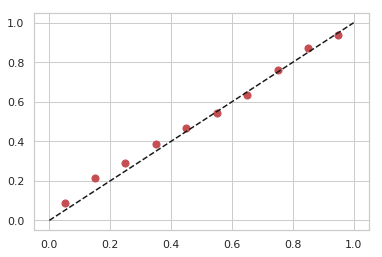

In [135]:
plot_fraction_pmem(gal,'beta')

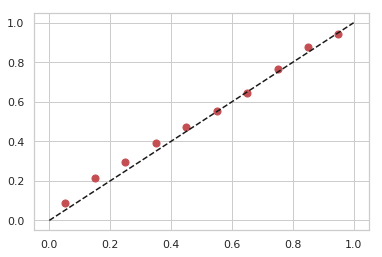

In [136]:
plot_fraction_pmem(gal,'flat')

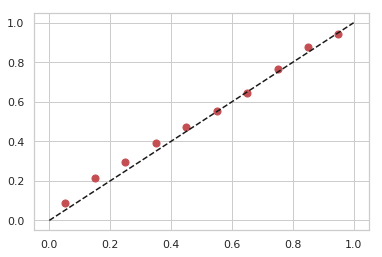

In [137]:
plot_fraction_pmem(gal,'old')

In [ ]:
# plt.plot(pvec,b.pr0.pdf(pvec))
# plt.plot(pvec,b.prior)

# plt.axvline(b.pr0.mean())
# plt.axvline(b.pm0,color='r')

In [53]:
ncls   = len(cat)
columns = ['flat','beta','old']

## compute the new probabilities
res = []
for i in range(ncls):
    print('alpha,beta: %.2f ,%.2f'%(alpha[i],beta[i]))
    b = bayes_prob(alpha[i],beta[i])
    b.load_likelihood(gal[keys[i]])
    b.get_probabilities()
    b.compute_ngals()
    res.append(b.probabilities)
    del b
    
## assign the new probabilities
gal = set_new_columns(gal,columns,val=-99.)
cat = set_new_columns(cat,['Ngals_%s'%c for c in columns],val=-99.)

for i in range(ncls):
    for col in columns:
        gal[col][keys[i]]  = res[i][col][:]
        cat['Ngals_%s'%col][i]= res[i]['Ngals_%s'%col]

alpha,beta: 34.00 ,29.64


NameError: name 'bayes_prob' is not defined

## Testing the Prior Distributions

To understand the differences between the models first, we make a set of fake data. A very simply setup, a grid of 100 points for each variable $N_c$ and $N_f$.

In [ ]:
import numpy as np
from scipy.stats import beta